In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.metrics import mean_squared_error

In [0]:
train = pd.read_csv('drive/My Drive/ClubMahindra/train/train.csv')
test = pd.read_csv('drive/My Drive/ClubMahindra/test/test.csv')

In [0]:
train.season_holidayed_code.fillna(2.0, inplace=True);
train.state_code_residence.fillna(1, inplace=True);
train.roomnights.replace({-45:45}, inplace=True);

test.season_holidayed_code.fillna(2.0, inplace=True);
test.state_code_residence.fillna(1, inplace=True);
test.roomnights.replace({-45:45}, inplace=True);

Text(0.5, 1.0, 'booking type code')

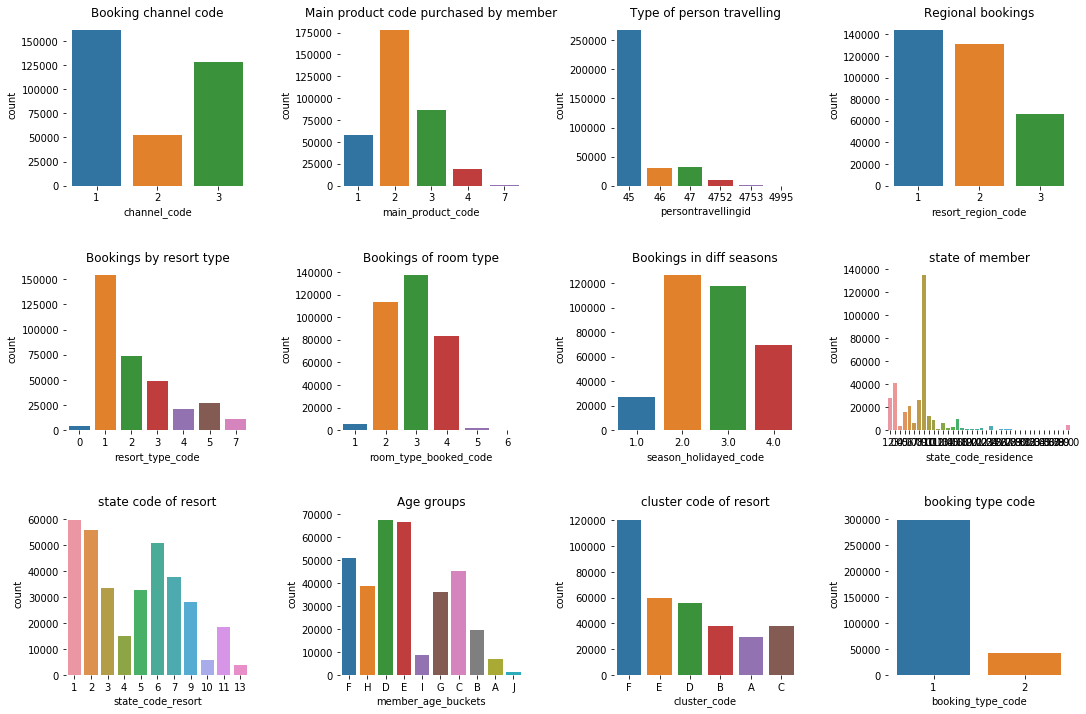

In [0]:
fig,axes = plt.subplots(3,4,figsize=(18,12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
sns.despine(bottom=True, left=True)
sns.countplot(train.channel_code, ax=axes[0][0]).set_title('Booking channel code')
sns.countplot(train.main_product_code, ax=axes[0][1]).set_title('Main product code purchased by member')
sns.countplot(train.persontravellingid, ax=axes[0][2]).set_title('Type of person travelling')
sns.countplot(train.resort_region_code, ax=axes[0][3]).set_title('Regional bookings')
sns.countplot(train.resort_type_code, ax=axes[1][0]).set_title('Bookings by resort type')
sns.countplot(train.room_type_booked_code, ax=axes[1][1]).set_title('Bookings of room type')
sns.countplot(train.season_holidayed_code, ax=axes[1][2]).set_title('Bookings in diff seasons')
sns.countplot(train.state_code_residence, ax=axes[1][3]).set_title('state of member')
sns.countplot(train.state_code_resort, ax=axes[2][0]).set_title('state code of resort')
sns.countplot(train.member_age_buckets, ax=axes[2][1]).set_title('Age groups')
sns.countplot(train.cluster_code, ax=axes[2][2]).set_title('cluster code of resort')
sns.countplot(train.booking_type_code, ax=axes[2][3]).set_title('booking type code')


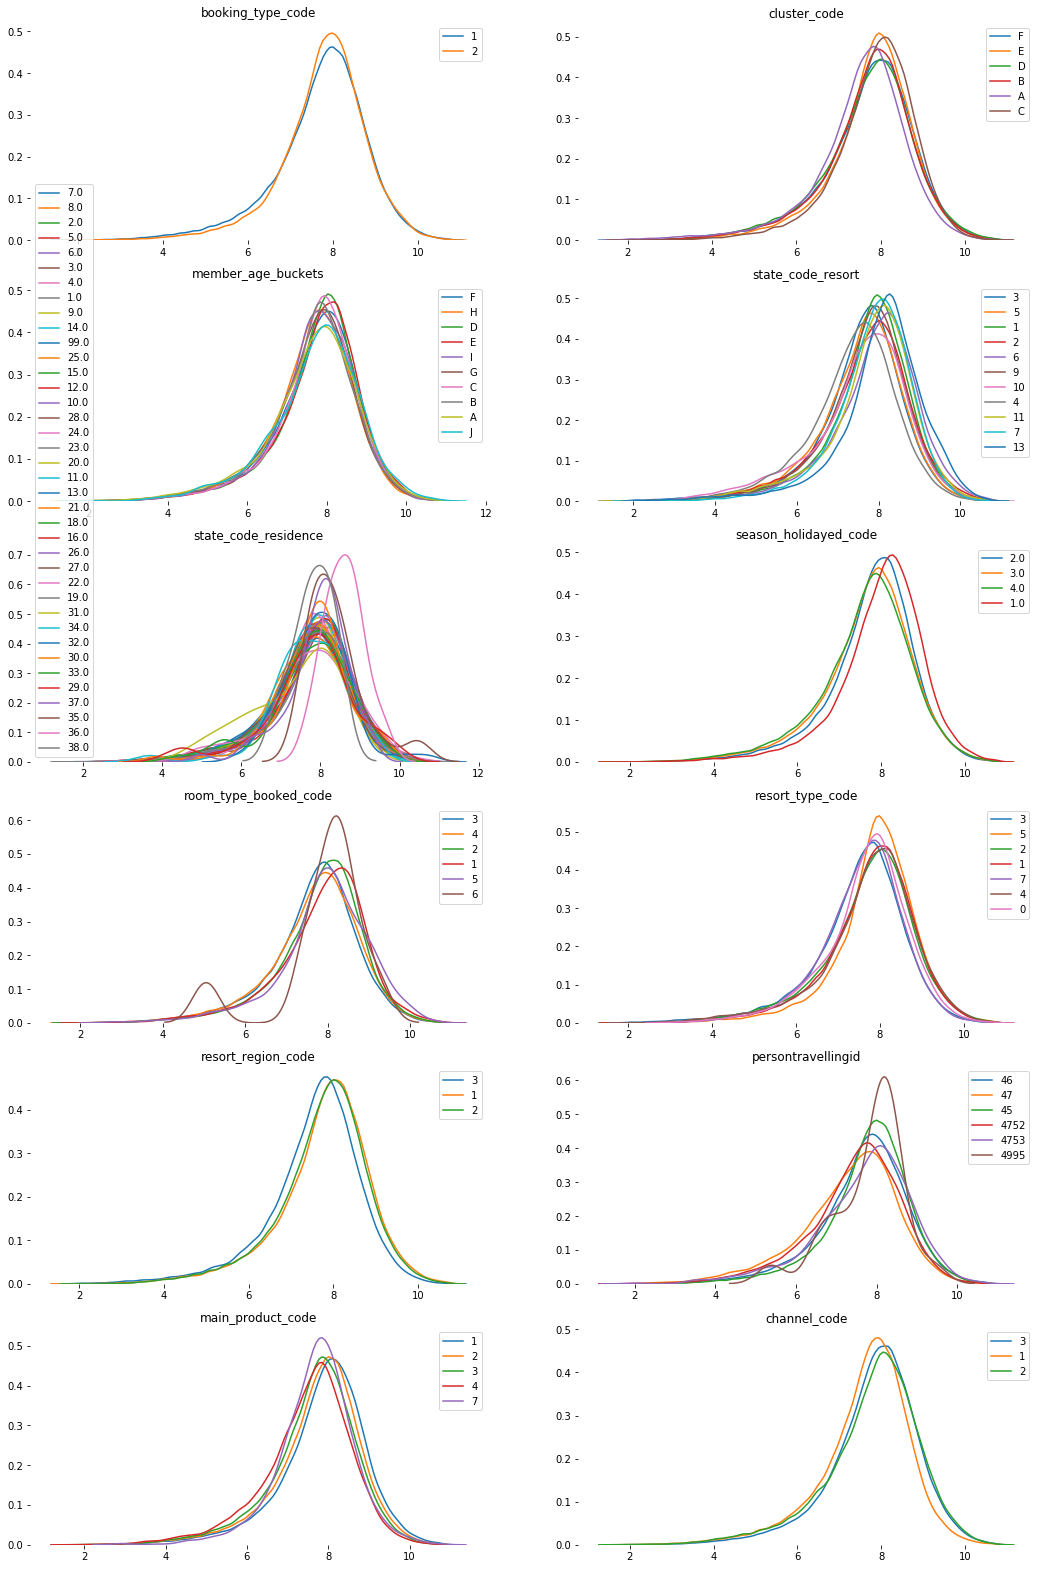

In [0]:
kde_feature_list = [
    ['booking_type_code','cluster_code'],['member_age_buckets','state_code_resort'],
    ['state_code_residence','season_holidayed_code'],['room_type_booked_code','resort_type_code'],
    ['resort_region_code','persontravellingid'],['main_product_code','channel_code']
]

fig, axes = plt.subplots(6,2,figsize=(18,28))
sns.despine(bottom=True, left=True)
for i in range(6):
  for j in range(2):
    temp = kde_feature_list[i][j]
    for c in train[temp].unique():
      sns.kdeplot(train[train[temp] == c]['amount_spent_per_room_night_scaled'], label=c, ax=axes[i][j]).set_title(temp)
plt.show()

In [0]:
# drop_list_kde = ['booking_type_code', 'cluster_code', 'member_age_buckets', 'resort_type_code', 'resort_region_code']
# train.drop(drop_list_kde, axis=1, inplace=True)

In [0]:
train['booking_date'] = pd.to_datetime(train.booking_date, dayfirst=True)
train['checkin_date'] = pd.to_datetime(train.checkin_date, dayfirst=True)
train['checkout_date'] = pd.to_datetime(train.checkout_date, dayfirst=True)
train['days_stayed'] = (train.checkout_date - train.checkin_date)
train['days_stayed'] = train.days_stayed.apply(lambda x:abs(x.days))
train['adv_days_book'] = (train.checkin_date - train.booking_date)
train['adv_days_book'] = train.adv_days_book.apply(lambda x:abs(x.days))
train['book_month'] = train.booking_date.dt.month
train['checkin_month'] = train.checkin_date.dt.month
train['booking_day'] = train.booking_date.dt.day
train['checkin_day'] = train.checkin_date.dt.day
train['check_in_week_day'] = train.checkin_date.dt.weekday_name
train['check_out_week_day'] = train.checkout_date.dt.weekday_name
train['booking_week_day'] = train.booking_date.dt.weekday_name
train.drop(['booking_date','checkin_date','checkout_date'], axis=1,inplace=True)

test['booking_date'] = pd.to_datetime(test.booking_date, dayfirst=True)
test['checkin_date'] = pd.to_datetime(test.checkin_date, dayfirst=True)
test['checkout_date'] = pd.to_datetime(test.checkout_date, dayfirst=True)
test['days_stayed'] = (test.checkout_date - test.checkin_date)
test['days_stayed'] = test.days_stayed.apply(lambda x:abs(x.days))
test['adv_days_book'] = (test.checkin_date - test.booking_date)
test['adv_days_book'] = test.adv_days_book.apply(lambda x:abs(x.days))
test['book_month'] = test.booking_date.dt.month
test['checkin_month'] = test.checkin_date.dt.month
test['booking_day'] = test.booking_date.dt.day
test['checkin_day'] = test.checkin_date.dt.day
test['check_in_week_day'] = test.checkin_date.dt.weekday_name
test['check_out_week_day'] = test.checkout_date.dt.weekday_name
test['booking_week_day'] = test.booking_date.dt.weekday_name
test.drop(['booking_date','checkin_date','checkout_date'], axis=1,inplace=True)

In [0]:
hi = np.quantile(train.amount_spent_per_room_night_scaled.tolist(), 0.95)
lo = np.quantile(train.amount_spent_per_room_night_scaled.tolist(), 0.05)
train = train[(train.amount_spent_per_room_night_scaled>=lo) & (train.amount_spent_per_room_night_scaled<=hi)]

In [0]:
train.drop(['reservation_id','memberid'], axis=1, inplace=True)
X_test = test.drop(['reservation_id', 'memberid'], axis=1)
# train = train[(train.amount_spent_per_room_night_scaled>=lo) & (train.amount_spent_per_room_night_scaled<=hi)]

In [0]:
X_train = train.drop('amount_spent_per_room_night_scaled', axis=1)

num_cols = X_train.select_dtypes(exclude='object').columns
for i in num_cols:
  for j in num_cols:
    # pass
    # for k in num_cols:
    #  if i == j == k:
    #   pass
    #  else:
    X_train[i+j+'_div'] = X_train[i] / X_train[j]
    X_test[i+j+'_div'] = X_test[i] / X_test[j]
    # X_train[i+j+k+'_mul'] = X_train[i] * X_train[j] * X_train[k]


X_train.replace({np.inf:99999, -np.inf:99999}, inplace=True)
X_train.fillna(0, inplace=True)
X_test.replace({np.inf:0, -np.inf:0}, inplace=True)
X_test.fillna(0, inplace=True)


features = pd.get_dummies(X_train)
features = features.drop('reservationstatusid_code_D', axis=1)
X_test = pd.get_dummies(X_test)
      
# train_pf = PolynomialFeatures(2, interaction_only=True).fit_transform(X_train)
target = train.amount_spent_per_room_night_scaled
target = target.tolist()

In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42) # , stratify=target_binned)
x_eval, x_test, y_eval, y_test = train_test_split(x_test, y_test, test_size=0.3, random_state=42)

In [0]:
lin = LinearRegression()
lin.fit(x_train, y_train)
y_pred_eval = lin.predict(x_eval)
print('EVAL RMSE: ', mean_squared_error(y_eval, y_pred_eval)**0.5)
y_pred_test = lin.predict(x_test)
print('TEST RMSE: ', mean_squared_error(y_test, y_pred_test)**0.5)

EVAL RMSE:  0.7085635401798728
TEST RMSE:  0.7121055322625869


In [0]:
submission = pd.DataFrame()
submission['reservation_id'] = test['reservation_id']
submission['amount_spent_per_room_night_scaled'] = lin.predict(X_test)
submission.to_csv('drive/My Drive/ClubMahindra/submission.csv', index=False)

In [0]:
rfr = RandomForestRegressor(max_depth=8)
rfr.fit(x_train, y_train)
y_pred_eval = rfr.predict(x_eval)
print('RMSE: ', mean_squared_error(y_eval, y_pred_eval)**0.5)
y_pred_test = rfr.predict(x_test)
print('TEST RMSE: ', mean_squared_error(y_test, y_pred_test)**0.5)


RMSE:  1.0010243745469667
TEST RMSE:  1.0077259917724481


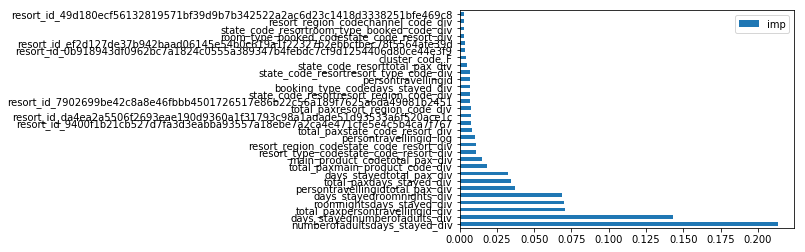

In [0]:
feat_imp = pd.DataFrame()
# feat_imp['feature_name'] = x_train.columns.tolist()
feat_imp['imp'] = rfr.feature_importances_
feat_imp.index = x_train.columns

imp_features = feat_imp.head(30).index.tolist()
feat_imp.sort_values(by='imp', ascending=False).iloc[:30].plot(kind='barh')

In [0]:
from xgboost import XGBRegressor
xg = XGBRegressor(max_depth=10)
xg.fit(x_train, y_train)
y_pred_eval = xg.predict(x_eval)
print('RMSE: ', mean_squared_error(y_eval, y_pred_eval)**0.5)
y_pred_test = xg.predict(x_test)
print('TEST RMSE: ', mean_squared_error(y_test, y_pred_test)**0.5)

RMSE:  0.9963800127108042
TEST RMSE:  0.9998091071935806
